# XGBoost versus equiprobable XOR

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
import xgboost

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Create a random sample X of features $x \in \left[ 0,1 \right[ \times \left[ 0,1 \right[$ :

In [2]:
X = rnd.rand( 100, 2 )

Calculate output for a XOR gate:

In [3]:
y = np.logical_xor( X[:,0]>0.5, X[:,1]>0.5 )

Select negative and positive samples:

In [4]:
X_pos = X[ y ]
X_neg = X[ ~y ]

Sample scatter plot:

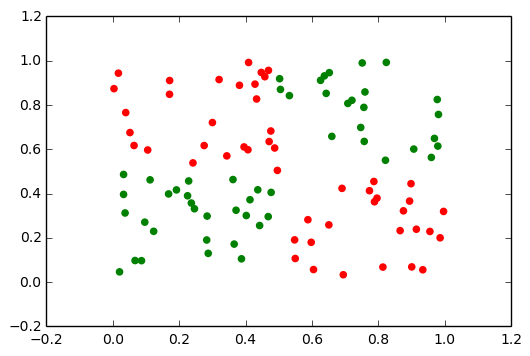

In [5]:
plt.scatter( X_pos[:, 0], X_pos[:, 1], color='red' )
plt.scatter( X_neg[:, 0], X_neg[:, 1], color='green' )
plt.show()

Use a xgboost classifier with only one tree on our sample, leading to a perfect prediction:

In [6]:
model = xgboost.XGBClassifier(n_estimators = 1)
model.fit(X, y)
print 'Accuracy : ', np.mean( model.predict(X) == y )

Accuracy :  1.0


Do it again with the same number of sample for each features combination:

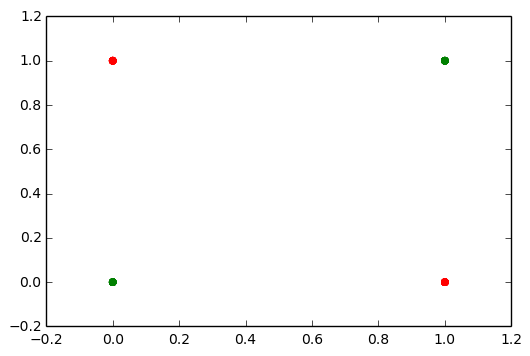

Accuracy :  0.5


In [7]:
X = np.array( [[0,0], [1,0], [0,1], [1,1]] )
for i in xrange(4) : X = np.vstack( (X, X) )

y = np.logical_xor( X[:,0]>0.5, X[:,1]>0.5 )
X_pos = X[ y ]
X_neg = X[ ~y ]
plt.scatter( X_pos[:, 0], X_pos[:, 1], color='red' )
plt.scatter( X_neg[:, 0], X_neg[:, 1], color='green' )
plt.show()

model = xgboost.XGBClassifier(n_estimators = 1)
model.fit(X, y)
print 'Accuracy : ', np.mean( model.predict(X) == y )

Indeed, the gain is always zero whatever the split !  
We can use a subsample value different from 1 to break the symmetry:

In [8]:
model = xgboost.XGBClassifier(n_estimators = 1, subsample = 0.9)
model.fit(X, y)
print 'Accuracy : ', np.mean( model.predict(X) == y )

Accuracy :  1.0
